Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

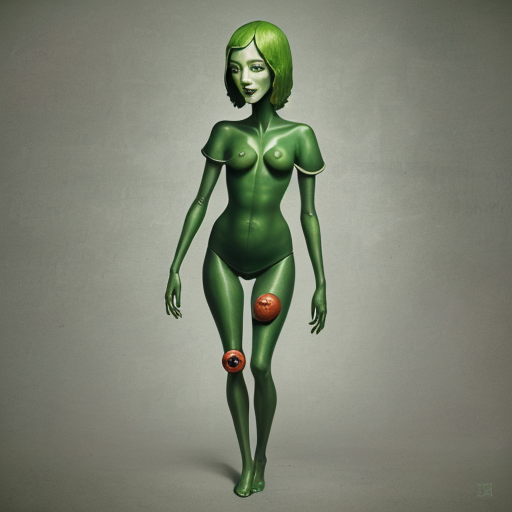

In [1]:
import torch
from diffusers import StableDiffusionPipeline

# Check if GPU is available and set device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the pipeline, adjusting precision based on device
if device == "cuda":
    pipe = StableDiffusionPipeline.from_pretrained(
        "Lykon/dreamshaper-8",
        torch_dtype=torch.float16,
        variant="fp16",
    ).to(device)
else:  # If using CPU, load with default precision
    pipe = StableDiffusionPipeline.from_pretrained("Lykon/dreamshaper-8").to(device)

# Define the prompt and generate the image
prompt = "A surreal collage of a green head attached to one single leg. The style is Surrealism collage."
image = pipe(prompt).images[0]

# Display the image (requires specific display environment like Colab or Jupyter Notebook)
image